In [1]:
import torch
import json
import numpy as np
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sparse_auto_encoder import SparseAutoencoder
from utils.model import load_GPT_model
from saes__extract_latent_activations import exract_latent_activations
from saes__filter_selective_neurons import find_selective_neurons
from saes__neuron_concept_assoc import calculate_neuron_to_concept_assoc
from saes__top_texts_for_neuron import top_texts_for_neuron
from saes__neuron_concept_mapping import build_neuron_concept_map

In [2]:
device = "cpu"

In [3]:
model = load_GPT_model(path="model_896_14_8_256.pth", device=device)

In [4]:
sae_1 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_1.load_state_dict(torch.load("sae_models/sae_layer1.pth", map_location=torch.device('cpu')))
sae_1.eval();

sae_2 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_2.load_state_dict(torch.load("sae_models/sae_layer2.pth", map_location=torch.device('cpu')))
sae_2.eval();

sae_3 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_3.load_state_dict(torch.load("sae_models/sae_layer3.pth", map_location=torch.device('cpu')))
sae_3.eval();

sae_4 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_4.load_state_dict(torch.load("sae_models/sae_layer4.pth", map_location=torch.device('cpu')))
sae_4.eval();

sae_5 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_5.load_state_dict(torch.load("sae_models/sae_layer5.pth", map_location=torch.device('cpu')))
sae_5.eval();

sae_6 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_6.load_state_dict(torch.load("sae_models/sae_layer6.pth", map_location=torch.device('cpu')))
sae_6.eval();

sae_7 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_7.load_state_dict(torch.load("sae_models/sae_layer7.pth", map_location=torch.device('cpu')))
sae_7.eval();

sae_8 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_8.load_state_dict(torch.load("sae_models/sae_layer8.pth", map_location=torch.device('cpu')))
sae_8.eval();

In [5]:
latents_l1 = exract_latent_activations(model, sae_1, layer=1)
latents_l2 = exract_latent_activations(model, sae_2, layer=2)
latents_l3 = exract_latent_activations(model, sae_3, layer=3)
latents_l4 = exract_latent_activations(model, sae_4, layer=4)
latents_l5 = exract_latent_activations(model, sae_5, layer=5)
latents_l6 = exract_latent_activations(model, sae_6, layer=6)
latents_l7 = exract_latent_activations(model, sae_7, layer=7)
latents_l8 = exract_latent_activations(model, sae_8, layer=8)

✅ Saved sae_probing/latent_activations_l1.pt with latents shape torch.Size([665, 2688]) and 665 ids.
✅ Saved sae_probing/latent_activations_l2.pt with latents shape torch.Size([665, 2688]) and 665 ids.
✅ Saved sae_probing/latent_activations_l3.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l4.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l5.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l6.pt with latents shape torch.Size([665, 4480]) and 665 ids.
✅ Saved sae_probing/latent_activations_l7.pt with latents shape torch.Size([665, 4480]) and 665 ids.
✅ Saved sae_probing/latent_activations_l8.pt with latents shape torch.Size([665, 4480]) and 665 ids.


In [6]:
def map_layer_neurons(layer, activation_threshold=5.0):
    find_selective_neurons(layer=layer, activation_threshold=activation_threshold)
    calculate_neuron_to_concept_assoc(layer=layer, threshold=activation_threshold);

    mappings = build_neuron_concept_map(layer=layer)
    print(f"✅ Done for layer {layer}")
    print('='*10)
    
    return mappings.head()

In [7]:
map_layer_neurons(layer=1)

Layer 1: N=665 tokensets, H=2688 neurons.
Window [5, 150], thresh=5.0. Selective found: 4
-> IDs saved to: sae_probing/selective_neuron_ids_l1.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l1.csv (44 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l1.csv
✅ Done for layer 1


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,1,236,female,0.273281,marriage,0.242121,0.114022,two-strong
1,1,907,male,0.279841,female,0.259798,0.071624,two-strong
2,1,1406,marriage,0.267718,female,0.214815,0.197607,two-strong
3,1,1829,family,0.248801,male,0.217916,0.124136,two-strong


In [8]:
map_layer_neurons(layer=2)

Layer 2: N=665 tokensets, H=2688 neurons.
Window [5, 150], thresh=5.0. Selective found: 9
-> IDs saved to: sae_probing/selective_neuron_ids_l2.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l2.csv (99 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l2.csv
✅ Done for layer 2


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,2,285,female,0.281838,marriage,0.249828,0.113574,two-strong
1,2,301,male,0.232620,None,NaN,1.000000,dominant
2,2,422,female,0.291562,marriage,0.233794,0.198133,two-strong
3,2,999,male,0.249850,family,0.224060,0.103221,two-strong
4,2,1240,male,0.269751,family,0.224400,0.168123,two-strong


In [9]:
map_layer_neurons(layer=3)

Layer 3: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 20
-> IDs saved to: sae_probing/selective_neuron_ids_l3.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l3.csv (220 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l3.csv
✅ Done for layer 3


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,3,181,female,0.372378,male,0.312383,0.161111,two-strong
1,3,221,marriage,0.238576,family,0.211312,0.114280,two-strong
2,3,293,marriage,0.266885,emotion,0.191971,0.280696,leaning
3,3,344,male,0.269751,family,0.210195,0.220783,leaning
4,3,383,female,0.280485,None,NaN,1.000000,dominant


In [10]:
map_layer_neurons(layer=4)

Layer 4: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 34
-> IDs saved to: sae_probing/selective_neuron_ids_l4.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l4.csv (374 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l4.csv
✅ Done for layer 4


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,4,10,female,0.337278,family,0.295963,0.122496,two-strong
1,4,52,emotion,0.313851,male,0.312464,0.004419,two-strong
2,4,76,marriage,0.393562,duty,0.217554,0.447217,leaning
3,4,117,male,0.213868,female,0.212472,0.006525,two-strong
4,4,208,family,0.382381,male,0.317750,0.169022,two-strong


In [11]:
map_layer_neurons(layer=5)

Layer 5: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 62
-> IDs saved to: sae_probing/selective_neuron_ids_l5.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l5.csv (682 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l5.csv
✅ Done for layer 5


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,5,4,marriage,0.260440,scandal,0.126387,0.514717,dominant
1,5,44,society,0.266867,scandal,0.157077,0.411402,leaning
2,5,60,female,0.329501,family,0.313789,0.047683,two-strong
3,5,210,marriage,0.247768,society,0.230182,0.070975,two-strong
4,5,221,society,0.381826,wealth,0.195825,0.487137,leaning


In [12]:
map_layer_neurons(layer=6)

Layer 6: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 105
-> IDs saved to: sae_probing/selective_neuron_ids_l6.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l6.csv (1155 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l6.csv
✅ Done for layer 6


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,6,2,love,0.325044,emotion,0.309545,0.047682,two-strong
1,6,101,marriage,0.236350,family,0.212175,0.102287,two-strong
2,6,226,male,0.251186,duty,0.147797,0.411601,leaning
3,6,263,society,0.287519,emotion,0.191411,0.334266,leaning
4,6,271,marriage,0.298230,None,NaN,1.000000,dominant


In [13]:
map_layer_neurons(layer=7)

Layer 7: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 148
-> IDs saved to: sae_probing/selective_neuron_ids_l7.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l7.csv (1628 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l7.csv
✅ Done for layer 7


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,7,2,society,0.397126,emotion,0.203798,0.486819,leaning
1,7,19,female,0.330570,duty,0.148396,0.551089,dominant
2,7,98,marriage,0.308285,emotion,0.238506,0.226346,leaning
3,7,101,marriage,0.242748,family,0.218740,0.098900,two-strong
4,7,121,family,0.561747,female,0.297654,0.470128,leaning


In [14]:
map_layer_neurons(layer=8)

Layer 8: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 142
-> IDs saved to: sae_probing/selective_neuron_ids_l8.pt
✅ Associations table saved: sae_probing/neuron_label_assoc_l8.csv (1562 rows)
✅ Primary/secondary mapping saved: sae_probing/neuron_concept_primary_secondary_l8.csv
✅ Done for layer 8


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,8,5,family,0.246946,wealth,0.188201,0.237886,leaning
1,8,23,marriage,0.235905,scandal,0.180980,0.232827,leaning
2,8,82,class,0.164589,None,NaN,1.000000,dominant
3,8,128,male,0.319260,love,0.143391,0.550864,dominant
4,8,132,marriage,0.267254,family,0.190498,0.287202,leaning


---

## Plot dual-themed neurons

Plotting function:

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

color_map = {
    "female": "#FAD7AC",
    "male": "#cc9290",
    "marriage": "#ed76b3",
    "love": "#CC0000",
    "wealth": "#007FFF",
    "emotion": "#9467bd",
    "family": "#CC6600",
    "duty": "#a4d9f2",
    "scandal and reputation": "#B3B3B3",
    "society": "#67AB9F",
    "neutral": "#e5ced0",
    "class": "#90ee90"
}

def plot_dual_theme_graph_from_csv(
    csv_path, *, color_map=color_map, ax=None, return_fig=False, seed=62,
    layout="spring", spread=1.8, layer="UNK"
):
    """Reads primary/secondary CSV and plots normalized dual-theme concept graph."""
    df = pd.read_csv(csv_path)
    if "primary_concept" not in df.columns or "secondary_concept" not in df.columns:
        raise ValueError("CSV must contain 'primary_concept' and 'secondary_concept' columns.")
    df = df.dropna(subset=["primary_concept", "secondary_concept"])

    # Build edge list (orderless)
    edges = []
    for _, row in df.iterrows():
        a = str(row["primary_concept"]).strip(" ,").lower()
        b = str(row["secondary_concept"]).strip(" ,").lower()
        if a and b and a != "unk" and b != "unk":
            edges.append((a, b))

    if not edges:
        fig, axp = plt.subplots(figsize=(6, 3))
        axp.text(0.5, 0.5, "No dual-theme data", ha="center", va="center")
        axp.axis("off")
        fig.tight_layout()
        return (fig, axp) if return_fig else None

    G = nx.MultiGraph()
    G.add_edges_from(edges)

    # Create axes if needed
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 12))
        created_fig = True
    else:
        fig = ax.figure

    # ---- Layout ----
    if layout == "kk":
        pos = nx.kamada_kawai_layout(G)
    else:
        base_k = 0.75 / max(len(G.nodes), 1) ** 0.25
        k = base_k * spread
        pos = nx.spring_layout(G, k=k, seed=seed, iterations=200)

    if spread > 1.0:
        xs, ys = zip(*pos.values())
        cx, cy = sum(xs)/len(xs), sum(ys)/len(ys)
        for n in pos:
            x, y = pos[n]
            pos[n] = (cx + (x - cx) * 1.15, cy + (y - cy) * 1.15)

    unique_nodes = list(G.nodes())
    node_colors = [color_map.get(node, "#cccccc") for node in unique_nodes]

    # ---- Edge normalization ----
    edge_weights = {tuple(sorted((u, v))): G.number_of_edges(u, v) for u, v in G.edges()}
    max_w = max(edge_weights.values())
    # scale edge widths: 1 (minimum) → 10 (maximum)
    norm_edges = {k: (0.5 + 19.5 * (w / max_w)) for k, w in edge_weights.items()}

    # ---- Draw ----
    nx.draw_networkx_nodes(G, pos, node_size=8000, node_color=node_colors, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight="bold", ax=ax)

    drawn = set()
    for (u, v), width in norm_edges.items():
        if (u, v) in drawn:
            continue
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=width, alpha=0.6, ax=ax)
        drawn.add((u, v))

    ax.set_title(f"Layer {layer}", fontsize=25)
    ax.axis("off")
    fig.tight_layout()

    if return_fig:
        return fig, ax

---

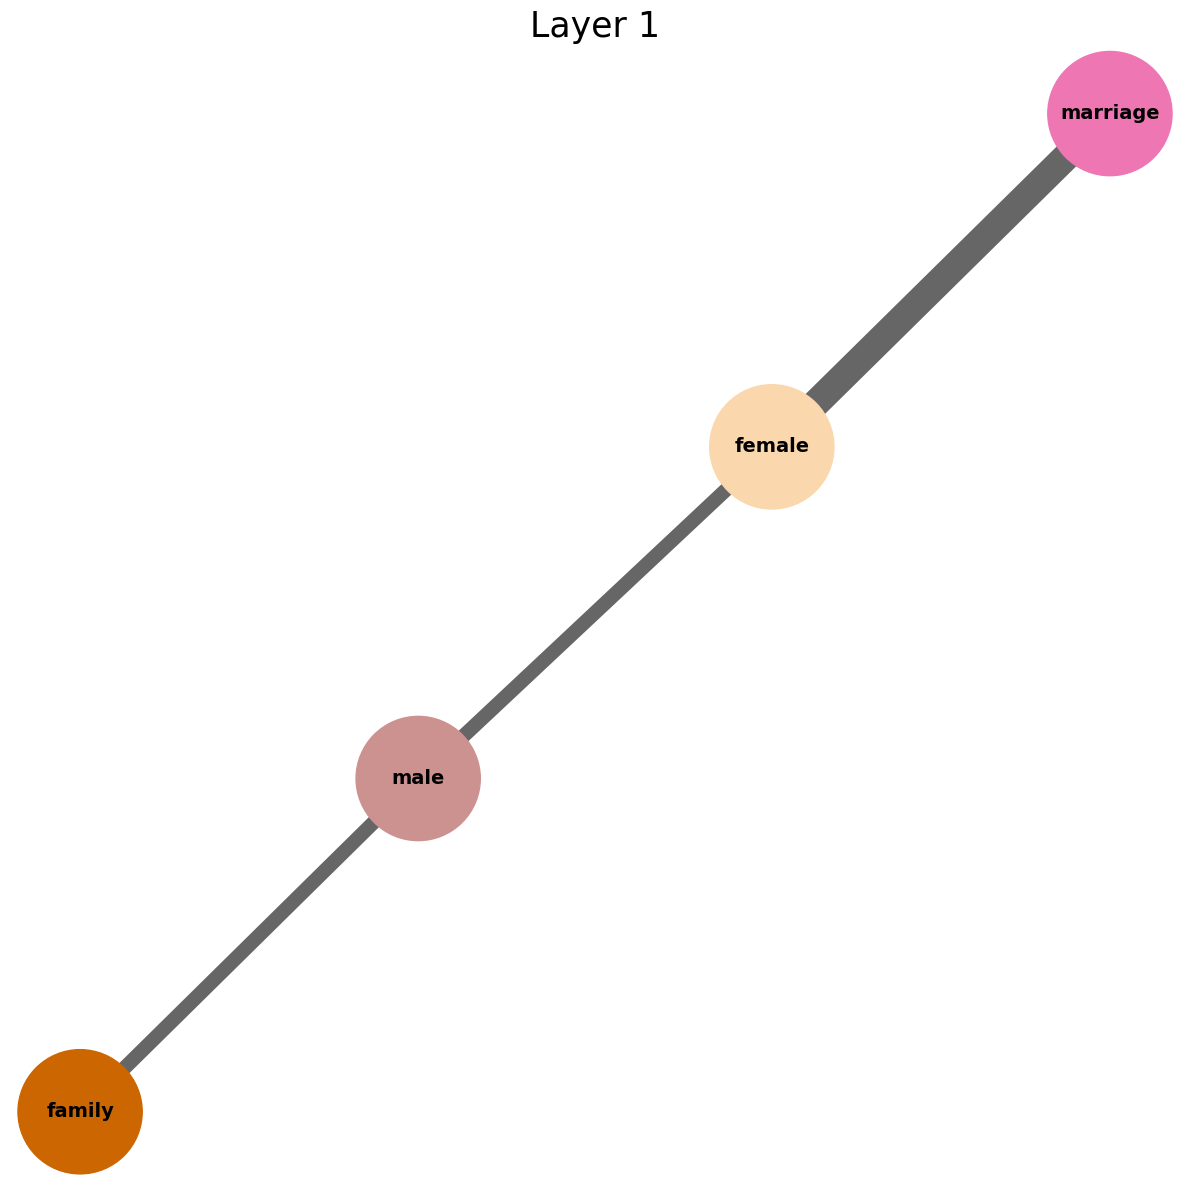

In [16]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l1.csv", layout="kk", layer=1)

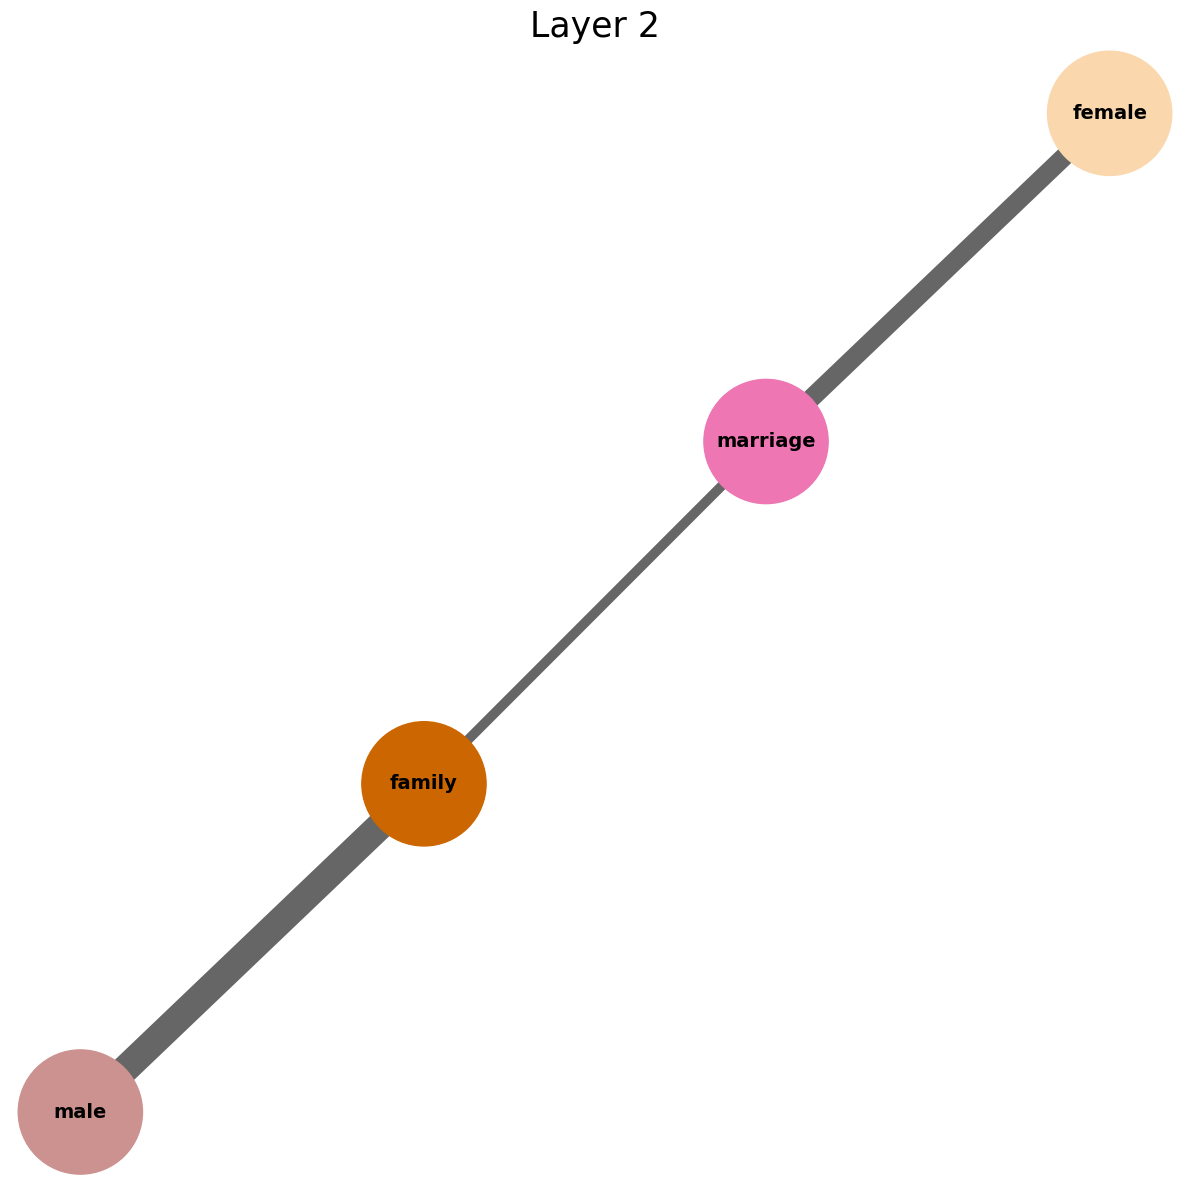

In [17]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l2.csv", layout="kk", layer=2)

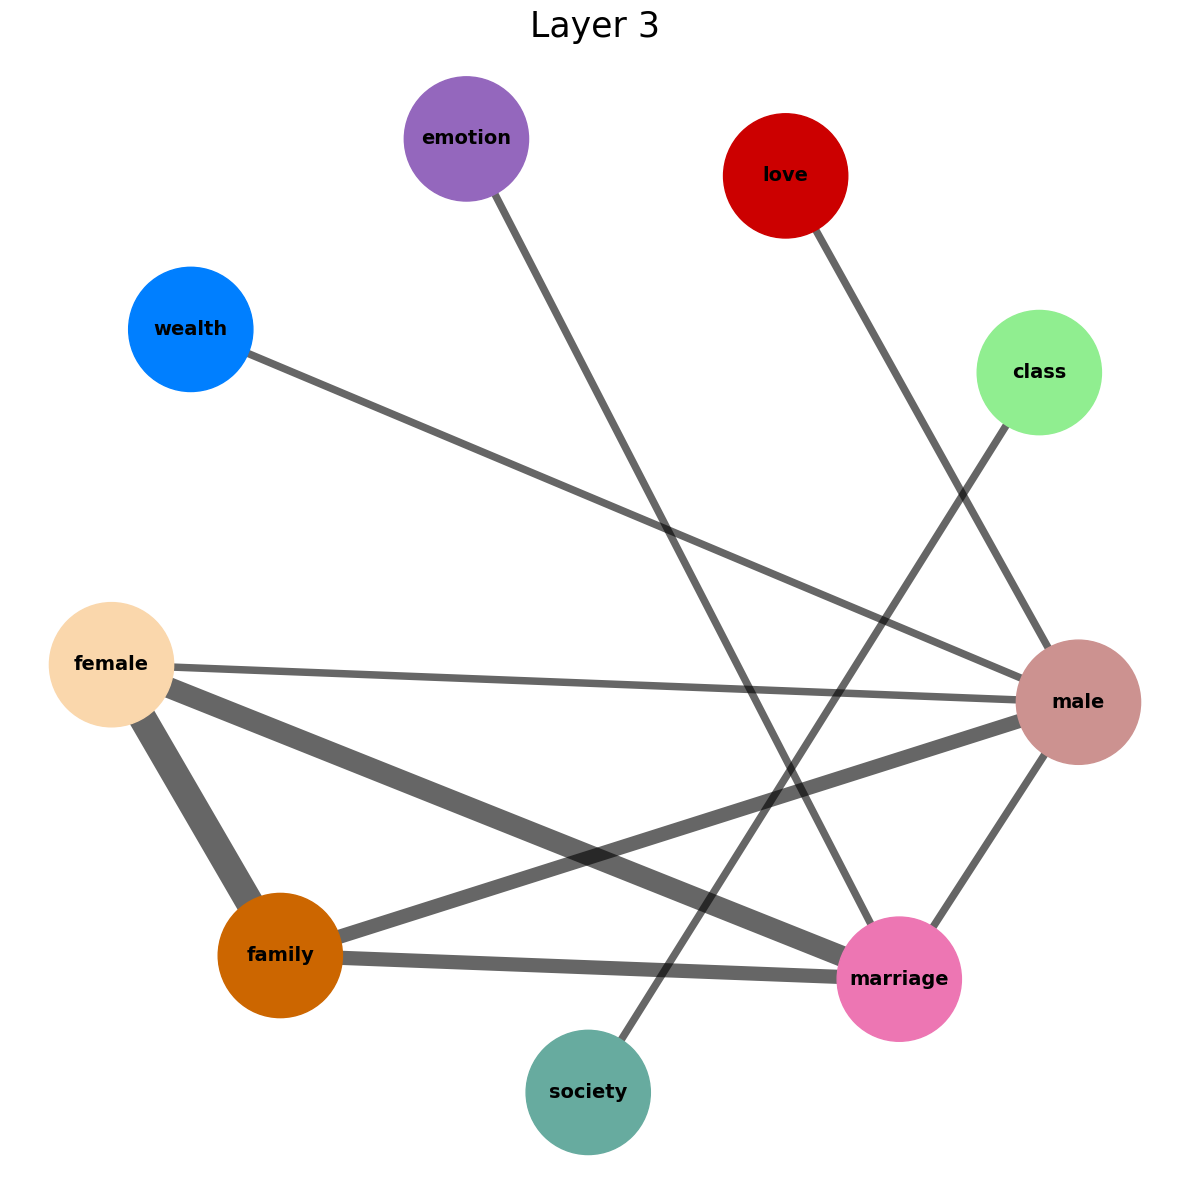

In [18]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l3.csv", spread=100, layer=3)

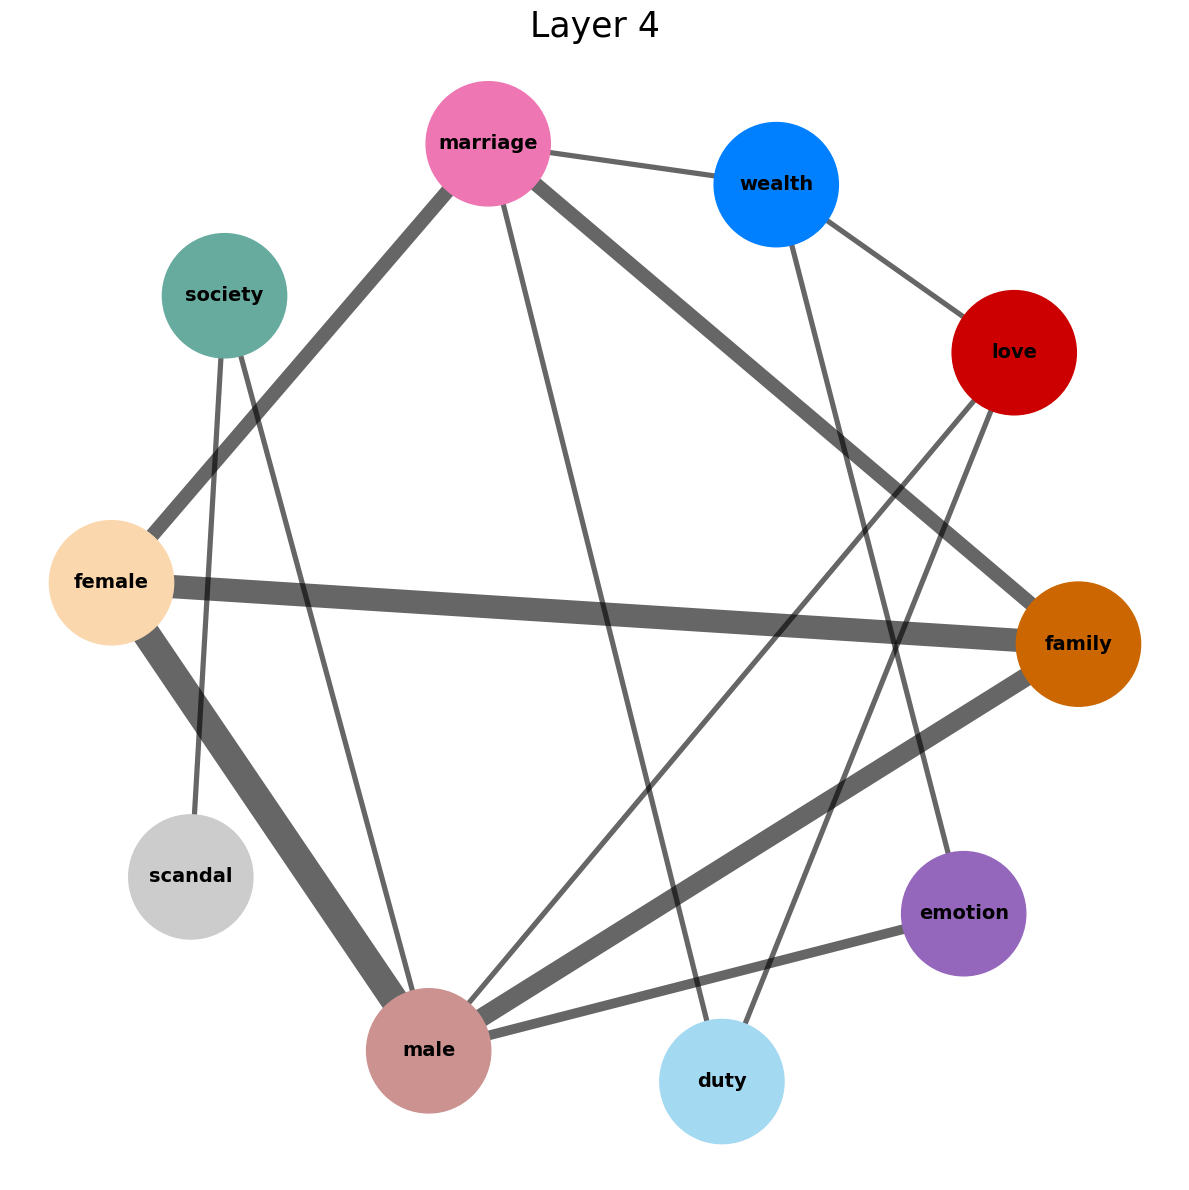

In [19]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l4.csv", spread=100, layer=4)

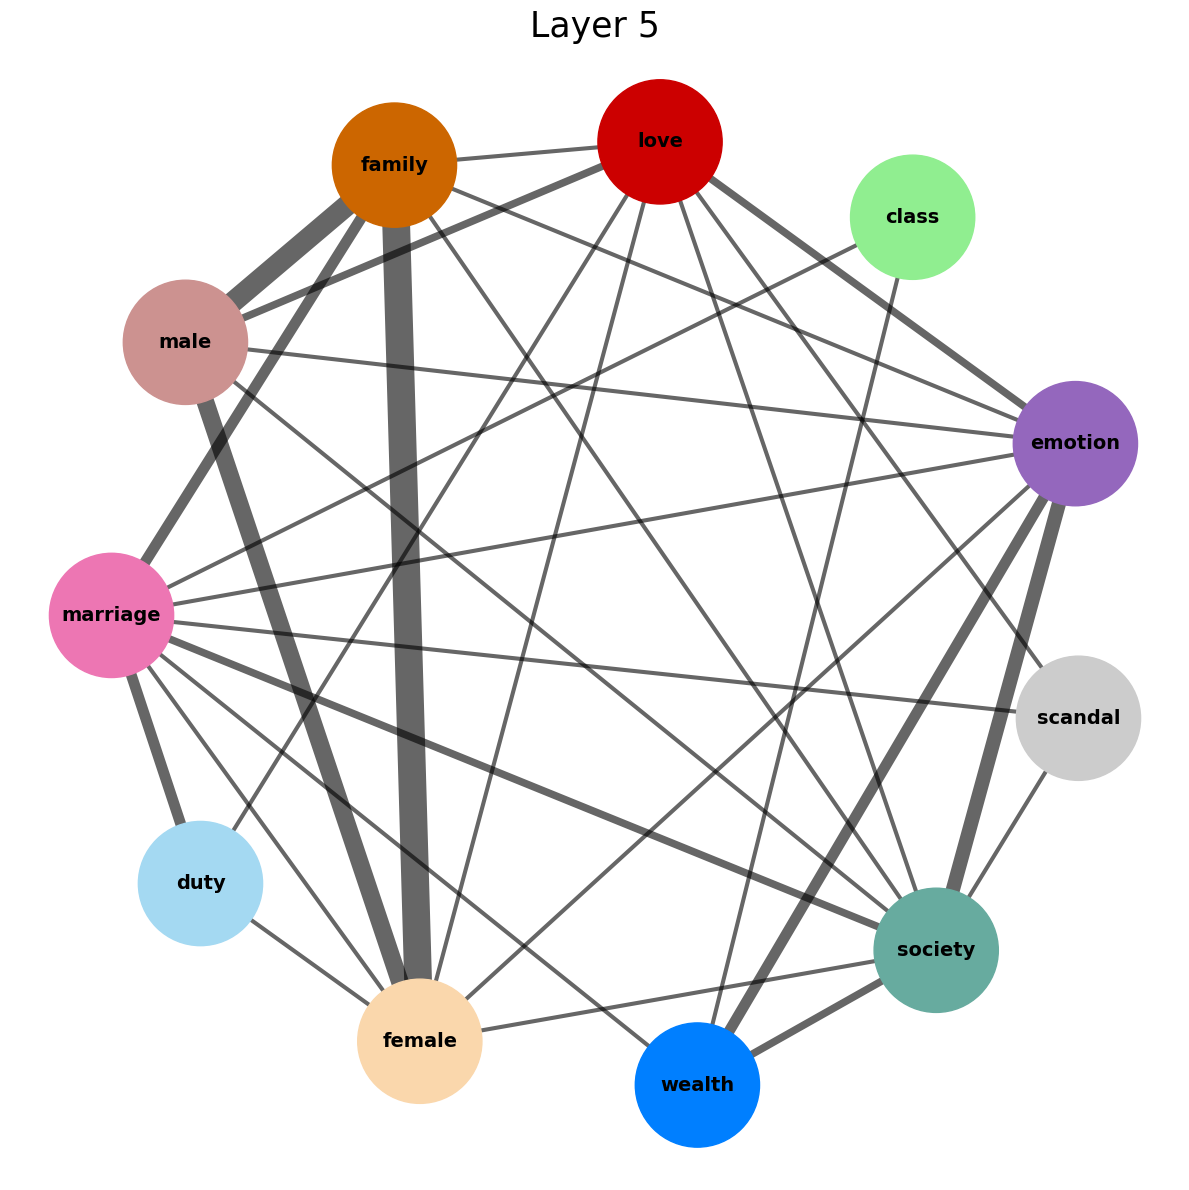

In [20]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l5.csv", spread=100, layer=5)

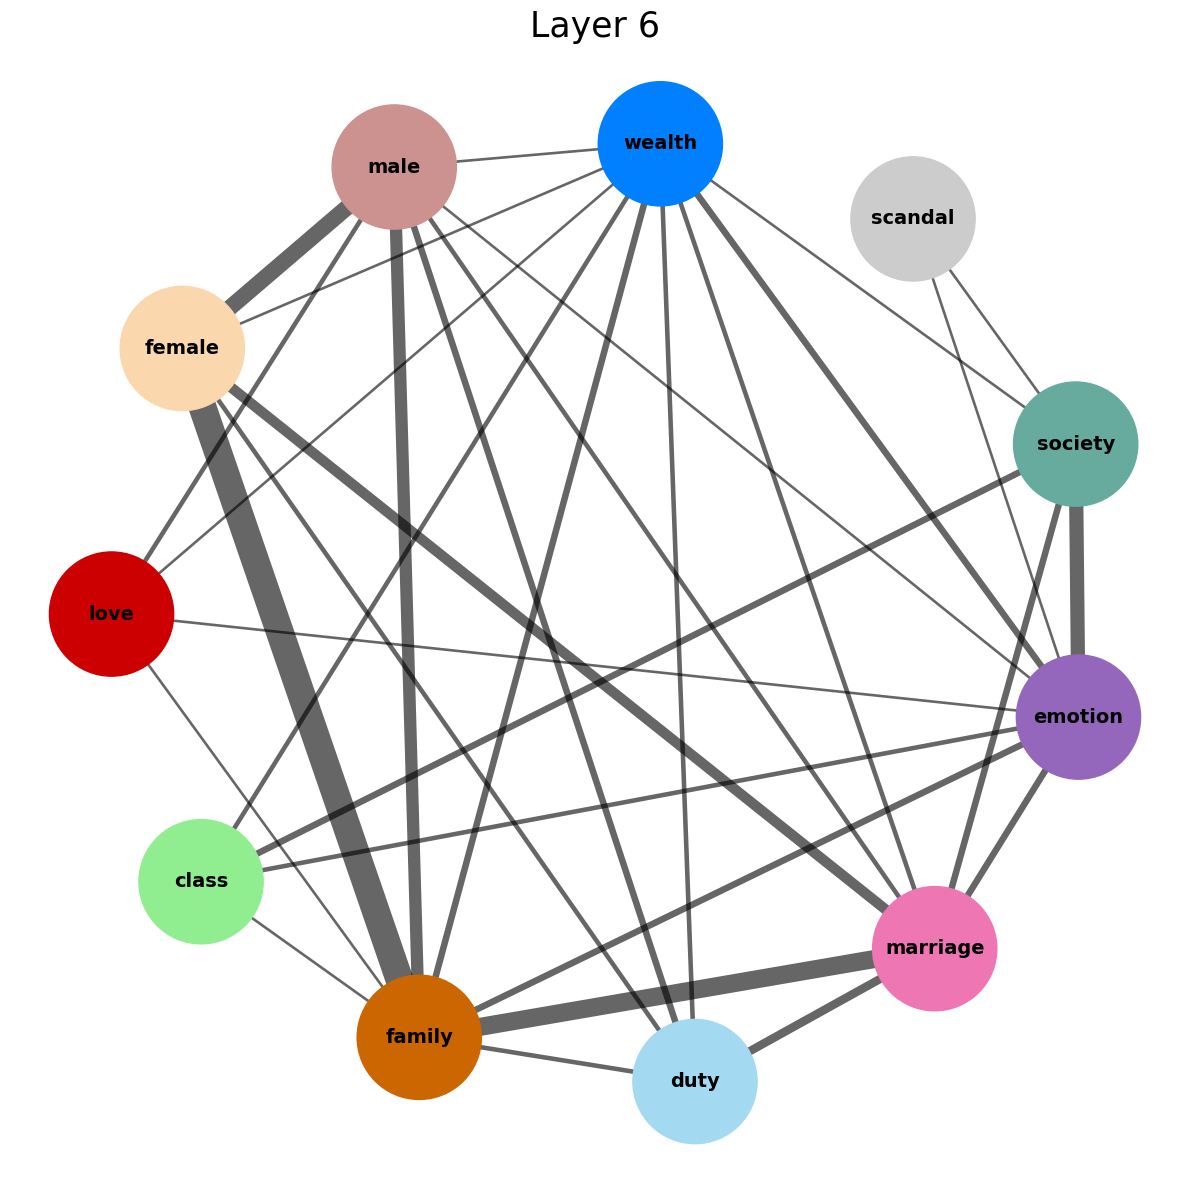

In [21]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l6.csv", spread=100, layer=6)

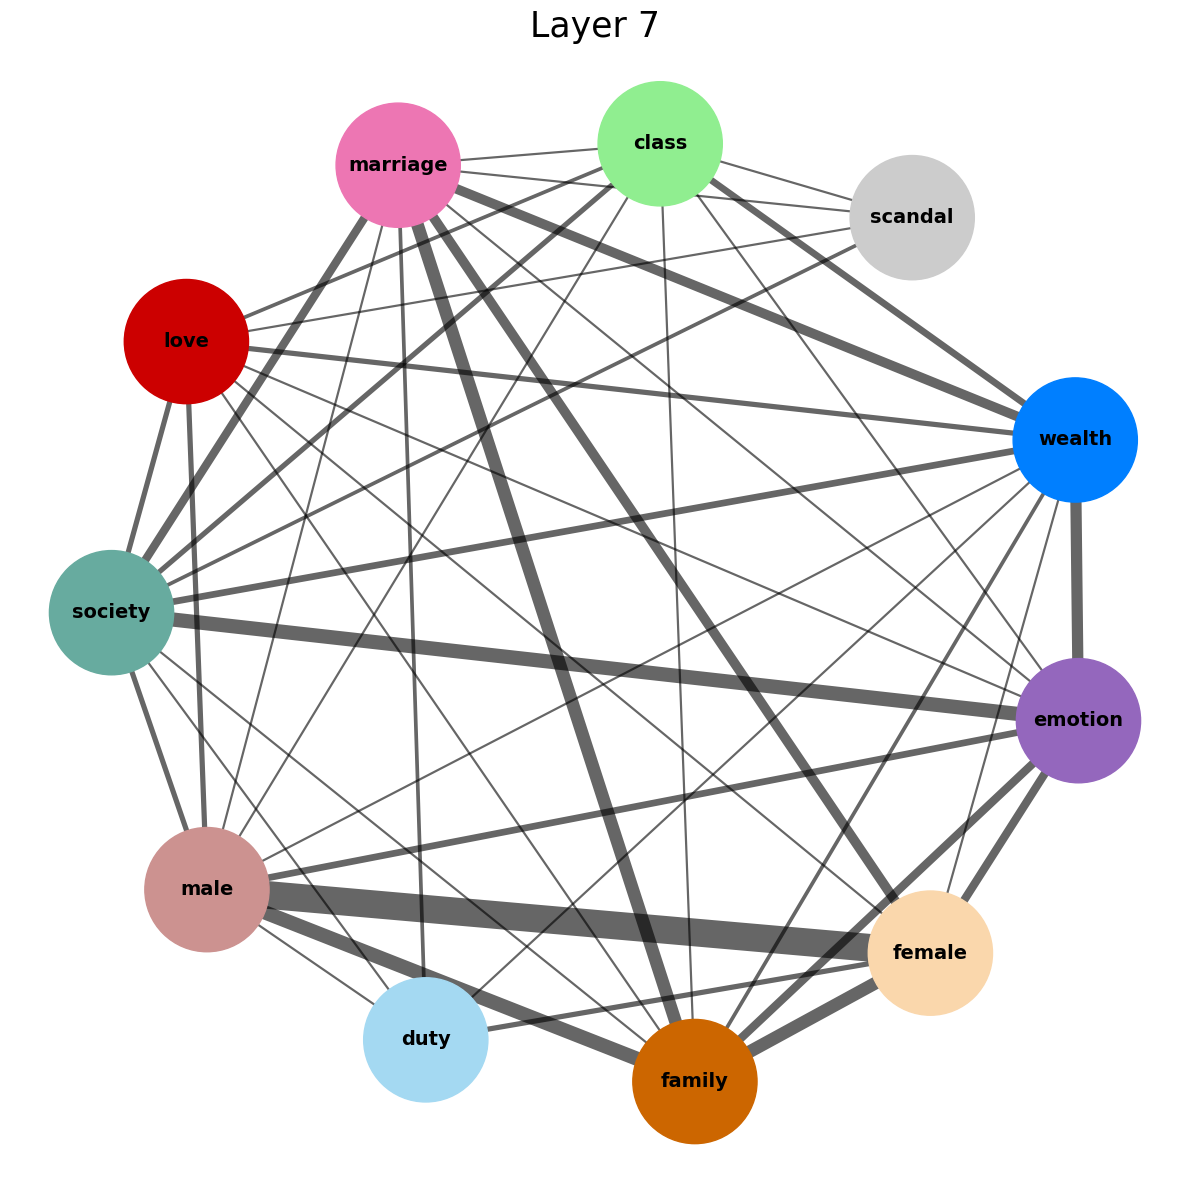

In [22]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l7.csv", spread=100, layer=7)

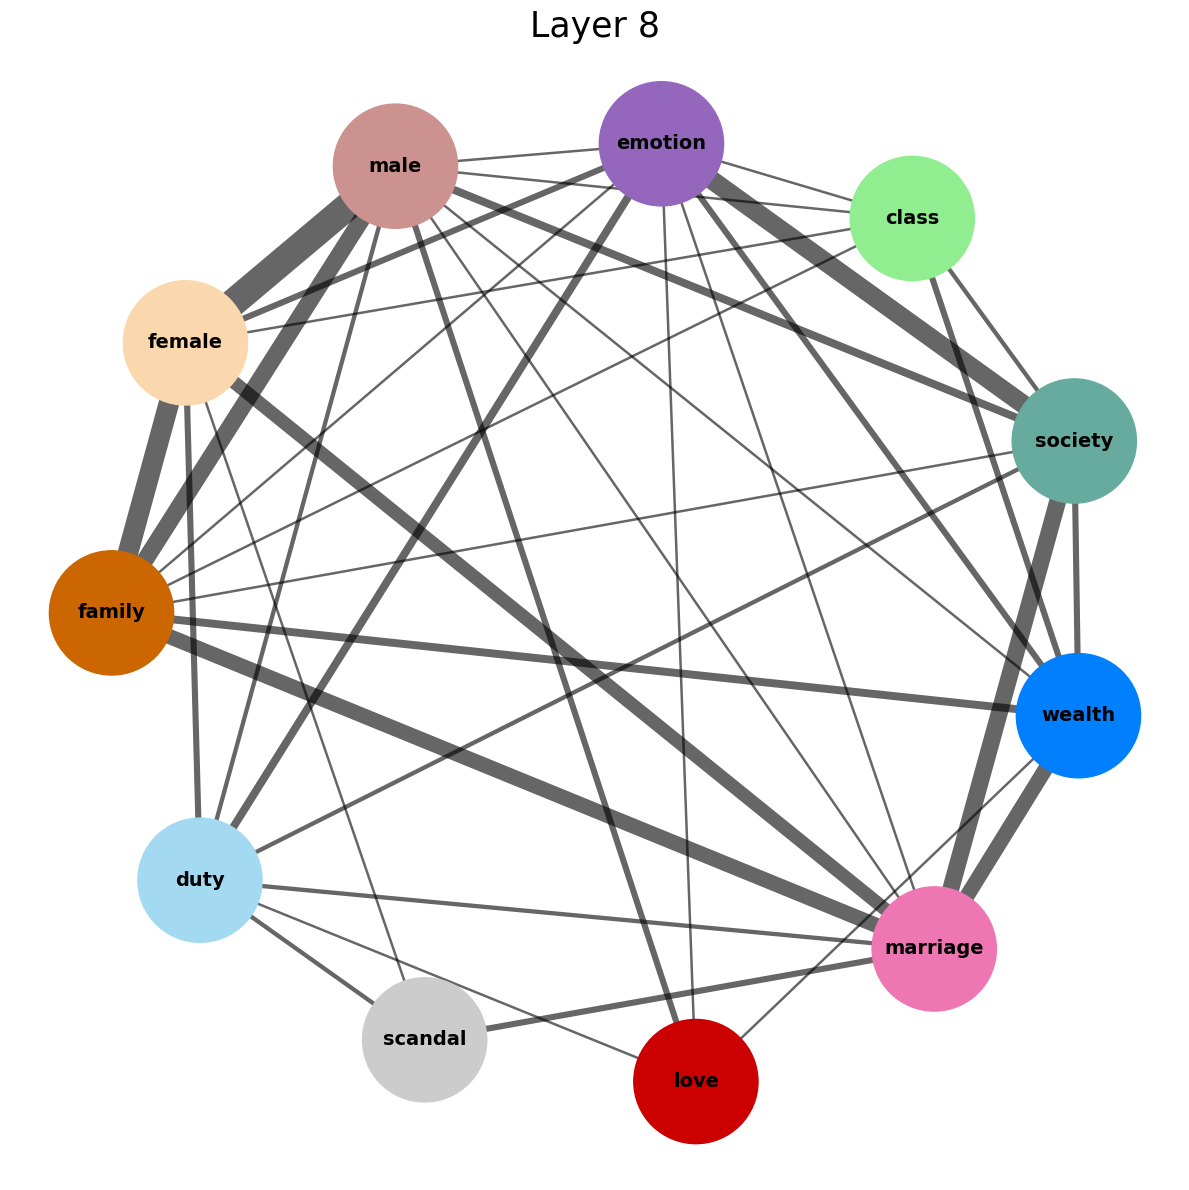

In [23]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l8.csv", spread=100, layer=8)

In [24]:
import glob, os
import pandas as pd

base_dir = "sae_probing"

In [25]:
pattern = os.path.join(base_dir, "neuron_label_assoc_l*.csv")
files = sorted(glob.glob(pattern))

dfs = []
for f in files:
    df = pd.read_csv(f)
    # make sure each file has a 'layer' column
    if "layer" not in df.columns:
        # try to parse layer number from filename
        layer_num = int(os.path.basename(f).split("_l")[-1].split(".")[0])
        df["layer"] = layer_num
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)
out_path = os.path.join(base_dir, "neuron_label_assoc_all_layers.csv")
merged.to_csv(out_path, index=False)

print(f"✅ Merged {len(files)} files into {out_path}, total rows: {len(merged)}")

✅ Merged 8 files into sae_probing/neuron_label_assoc_all_layers.csv, total rows: 5764


In [26]:
pattern = os.path.join(base_dir, "neuron_concept_primary_secondary_l*.csv")
files = sorted(glob.glob(pattern))

dfs = []
for f in files:
    df = pd.read_csv(f)
    # make sure each file has a 'layer' column
    if "layer" not in df.columns:
        # try to parse layer number from filename
        layer_num = int(os.path.basename(f).split("_l")[-1].split(".")[0])
        df["layer"] = layer_num
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)
out_path = os.path.join(base_dir, "neuron_concept_primary_secondary_all_layers.csv")
merged.to_csv(out_path, index=False)

print(f"✅ Merged {len(files)} files into {out_path}, total rows: {len(merged)}")

✅ Merged 8 files into sae_probing/neuron_concept_primary_secondary_all_layers.csv, total rows: 523


In [27]:
all_layers_assoc = pd.read_csv(os.path.join(base_dir, "neuron_label_assoc_all_layers.csv"))
all_layers_assoc = all_layers_assoc[all_layers_assoc["ΔP"] >= 0]
averages = (
    all_layers_assoc
    .drop(columns=["neuron", "concept"])
    .groupby("layer").mean(numeric_only=True)
)

out_path = os.path.join(base_dir, "analysis", "mean_assoc_metrics_all_layers.csv")
averages.to_csv(out_path)

averages.head()

,AP,AUROC,ΔP,P(fire|1),P(fire|0),lift,label_support,neuron_fires_total
layer,,,,,,,,
1,0.223011,0.507601,0.020191,0.026317,0.006126,3082.832912,129.769231,6.769231
2,0.265198,0.541196,0.055937,0.077242,0.021305,9634.147127,134.400000,21.500000
3,0.244610,0.542637,0.030907,0.047301,0.016394,5292.374187,129.169492,14.983051
4,0.247048,0.553816,0.037354,0.061408,0.024054,3295.982922,124.933962,20.877358
5,0.238555,0.549067,0.033299,0.054011,0.020712,2742.895790,123.636792,18.051887


In [30]:
all_layers_assoc[all_layers_assoc["AP"] >= 0.5].head()

,layer,neuron,concept,AP,AUROC,ΔP,P(fire|1),P(fire|0),lift,label_support,neuron_fires_total
100,2,1466,male,0.562376,0.739152,0.038467,0.038469,0.000002,20580.787762,130,5
276,3,2130,male,0.591759,0.724515,0.046159,0.046161,0.000002,24696.122247,130,6
352,3,3419,female,0.520192,0.745646,0.088893,0.088895,0.000002,47114.491866,135,12
595,4,2130,male,0.611021,0.761150,0.176926,0.176928,0.000002,94656.808499,130,23
1122,5,2093,female,0.537879,0.730776,0.103708,0.103710,0.000002,54966.252864,135,14


In [31]:
all_mappings = pd.read_csv(os.path.join(base_dir, "neuron_concept_primary_secondary_all_layers.csv"))
# target (layer, neuron) pairs
targets = [(2, 1466), (3, 2130), (3, 3419), (4, 2130), (5, 2093)]
keys = pd.DataFrame(targets, columns=["layer", "neuron"])

filtered = all_mappings.merge(keys, on=["layer", "neuron"], how="inner")
# rows NOT in the targets:
# dropped = df.merge(keys, on=["layer","neuron"], how="left", indicator=True).query("_merge=='left_only'").drop(columns="_merge")
filtered.head()

,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,2,1466,male,0.562376,NaN,NaN,1.000000,dominant
1,3,2130,male,0.591759,love,0.148209,0.749545,dominant
2,3,3419,female,0.520192,family,0.323197,0.378696,leaning
3,4,2130,male,0.611021,family,0.222909,0.635185,dominant
4,5,2093,female,0.537879,love,0.183849,0.658196,dominant


In [ ]:
2	1466	male	0.562376	0.739152	0.038467	0.038469	0.000002	20580.787762	130	5
3	2130	male	0.591759	0.724515	0.046159	0.046161	0.000002	24696.122247	130	6
3	3419	female	0.520192	0.745646	0.088893	0.088895	0.000002	47114.491866	135	12
4	2130	male	0.611021	0.761150	0.176926	0.176928	0.000002	94656.808499	130	23
5	2093	female	0.537879	0.730776	0.103708	0.103710	0.000002	54966.252864	135	14


In [ ]:
layer	neuron	primary_concept	primary_AP	secondary_concept	secondary_AP	polarity_score	polarity_flag
0	2	1466	male	0.562376	NaN	NaN	1.000000	dominant
1	3	2130	male	0.591759	love	0.148209	0.749545	dominant
2	3	3419	female	0.520192	family	0.323197	0.378696	leaning
3	4	2130	male	0.611021	family	0.222909	0.635185	dominant
4	5	2093	female	0.537879	love	0.183849	0.658196	dominant
